# Student exam performance Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv("../datasets/students-exam/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.shape

(1000, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Data analysis

In [7]:
print("Math mean: {:.3f}".format(np.mean(data["math score"])))
print("Reading mean: {:.3f}".format(np.mean(data["reading score"])))
print("Writing mean: {:.3f}".format(np.mean(data["writing score"])))

Math mean: 66.089
Reading mean: 69.169
Writing mean: 68.054


In [8]:
data["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [9]:
high_school = data[data["parental level of education"] == "high school"]
bachelor = data[data["parental level of education"] == "bachelor's degree"]
some_college = data[data["parental level of education"] == "some college"]
master = data[data["parental level of education"] == "master's degree"]
associate = data[data["parental level of education"] == "associate's degree"]
some_high_school = data[data["parental level of education"] == "some high school"]

In [14]:
parental_levels = ["Some high school", "High school", "Some college", "Associate", "Bachelor", "Master"]
education_list=[len(some_high_school),len(high_school),len(some_college),len(associate),len(bachelor),len(master)]

([<matplotlib.patches.Wedge at 0x1253cb9b0>,
 [Text(0.930607806789927, 0.5864887977972316, 'Some high school'),
  Text(-0.1857168066438953, 1.0842090516731513, 'High school'),
  Text(-1.0968747892626372, 0.0828594996367077, 'Some college'),
  Text(-0.2601489135374882, -1.0687949021141825, 'Associate'),
  Text(0.8112644257554884, -0.7428660925790178, 'Bachelor'),
  Text(1.0811581857178525, -0.20272389463327067, 'Master')])

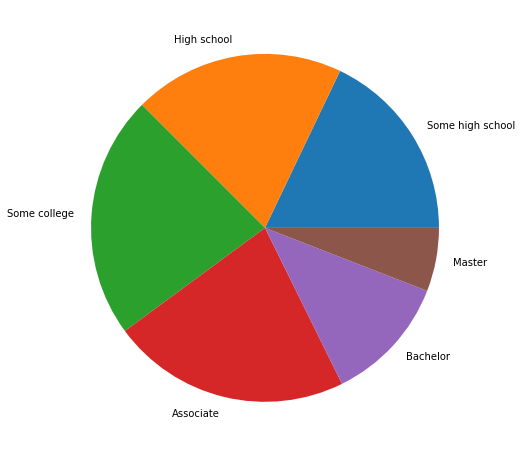

In [17]:
plt.figure(figsize=(8,8))
plt.pie(education_list, labels=parental_levels)

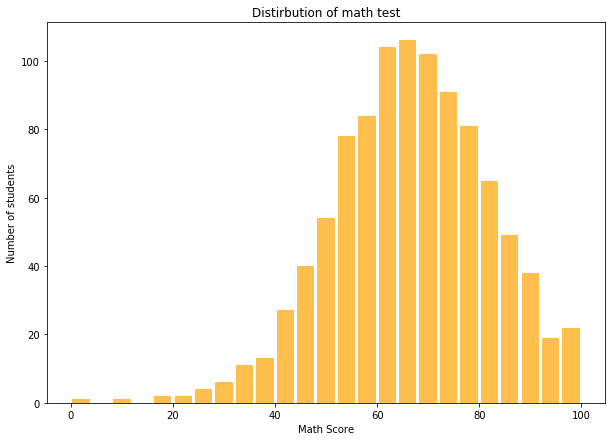

In [26]:
plt.figure(figsize=(10,7))
plt.hist(data["math score"], color="orange", alpha=0.7, rwidth=0.85, bins="auto")
plt.title("Distirbution of math test")
plt.xlabel("Math Score")
plt.ylabel("Number of students")
plt.show()

## Data selection

In [66]:
education_params = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}

lunch_params = {
    "standard": 1,
    "free/reduced": 2
}

course_params = {
    "none": 0,
    "completed": 1
}

gender_params = {
    "female": 1,
    "male": 2
}

race_params = {
    "group A": 1,
    "group B": 2,
    "group C": 3,
    "group D": 4,
    "group E": 5
}

In [67]:
data["parental level of education"] = data["parental level of education"].map(education_params)
data["lunch"] = data["lunch"].map(lunch_params)
data["test preparation course"] = data["test preparation course"].map(course_params)
data["gender"] = data["gender"].map(gender_params)
data["race/ethnicity"] = data["race/ethnicity"].map(race_params)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,2,4,1,0,72,72,74
1,1,3,2,1,1,69,90,88
2,1,2,5,1,0,90,95,93
3,2,1,3,2,0,47,57,44
4,2,3,2,1,0,76,78,75


In [68]:
data["total score"] = data["math score"] + data["reading score"] + data["writing score"]
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,1,2,4,1,0,72,72,74,218
1,1,3,2,1,1,69,90,88,247
2,1,2,5,1,0,90,95,93,278
3,2,1,3,2,0,47,57,44,148
4,2,3,2,1,0,76,78,75,229


In [69]:
data.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
gender,1.000000,-0.001502,-0.043934,-0.021372,0.006028,0.167982,-0.244313,-0.301225,-0.130861
race/ethnicity,-0.001502,1.000000,0.095906,-0.046563,0.017508,0.216415,0.145253,0.165691,0.185168
parental level of education,-0.043934,0.095906,1.000000,0.023259,-0.007143,0.159432,0.190908,0.236715,0.205785
lunch,-0.021372,-0.046563,0.023259,1.000000,0.017044,-0.350877,-0.229560,-0.245769,-0.290064
test preparation course,0.006028,0.017508,-0.007143,0.017044,1.000000,0.177702,0.241780,0.312946,0.256710
math score,0.167982,0.216415,0.159432,-0.350877,0.177702,1.000000,0.817580,0.802642,0.918746
reading score,-0.244313,0.145253,0.190908,-0.229560,0.241780,0.817580,1.000000,0.954598,0.970331
writing score,-0.301225,0.165691,0.236715,-0.245769,0.312946,0.802642,0.954598,1.000000,0.965667
total score,-0.130861,0.185168,0.205785,-0.290064,0.256710,0.918746,0.970331,0.965667,1.000000


### Reading score vs writing score

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Text(0.5, 1.0, 'Reading score vs Writing score')

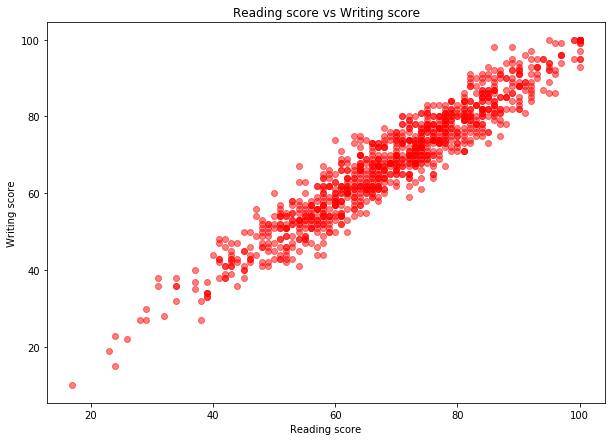

In [82]:
plt.figure(figsize=(10,7))
plt.scatter(data["reading score"], data["writing score"], c="red", alpha=0.5)
plt.xlabel("Reading score")
plt.ylabel("Writing score")
plt.title("Reading score vs Writing score")

In [97]:
x = np.array(data["reading score"]).reshape(-1,1)
y = np.array(data["writing score"]).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)

print("Accurary reading-writing: {:.3f}".format(model.score(x, y)*100))

Accurary reading-writing: 91.126


## Math score vs reading score

Text(0.5, 1.0, 'Math score vs Reading score')

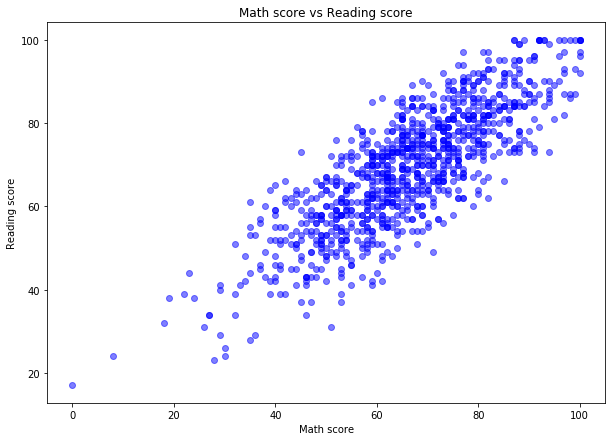

In [94]:
plt.figure(figsize=(10,7))
plt.scatter(data["math score"], data["reading score"], c="b", alpha=0.5)
plt.xlabel("Math score")
plt.ylabel("Reading score")
plt.title("Math score vs Reading score")

In [98]:
x = np.array(data["math score"]).reshape(-1,1)
y = np.array(data["reading score"]).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)

print("Accurary math-reading: {:.3f}".format(model.score(x, y)*100))

Accurary math-reading: 66.844


## Math score vs writing score

Text(0.5, 1.0, 'Math score vs Writing score')

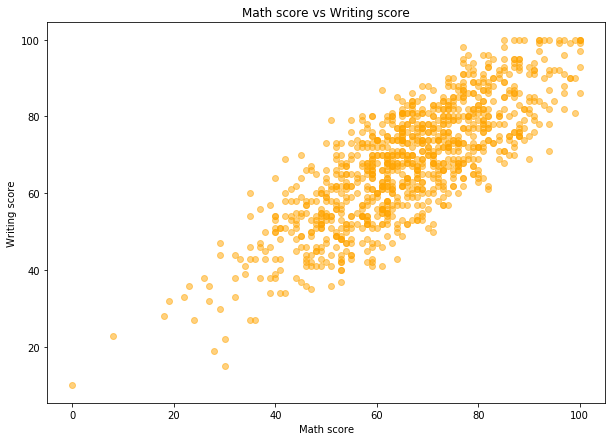

In [99]:
plt.figure(figsize=(10,7))
plt.scatter(data["math score"], data["writing score"], c="orange", alpha=0.5)
plt.xlabel("Math score")
plt.ylabel("Writing score")
plt.title("Math score vs Writing score")

In [101]:
x = np.array(data["math score"]).reshape(-1,1)
y = np.array(data["writing score"]).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)

print("Accurary math-writing: {:.3f}".format(model.score(x, y)*100))

Accurary math-writing: 64.423
